In [47]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


import tqdm
from tqdm.auto import tqdm

In [2]:
x_list = [1., 2., 3.]
x_tensor = torch.tensor(x_list)
x_tensor

tensor([1., 2., 3.])

In [3]:
zeros_tensor = torch.zeros(2, 3)
zeros_tensor

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [4]:
ones_tensor = torch.ones(2, 3)
ones_tensor

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [5]:
eye_tensor = torch.eye(6)
eye_tensor

tensor([[1., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1.]])

In [6]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])

y_tensor = torch.tensor([
    [-10, 3],
    [5, -4]
])

In [7]:
x_tensor + y_tensor 

tensor([[-9,  5],
        [ 8,  0]])

In [8]:
x_tensor @ y_tensor

tensor([[  0,  -5],
        [-10,  -7]])

In [12]:
torch.cat([x_tensor, y_tensor], dim=0)

tensor([[  1,   2],
        [  3,   4],
        [-10,   3],
        [  5,  -4]])

In [10]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])

x_numpy = x_tensor.numpy()
x_numpy

array([[1, 2],
       [3, 4]])

In [13]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])

x_tensor.tolist()

[[1, 2], [3, 4]]

In [14]:
x_tensor = torch.tensor([3])

x_tensor.item()

3

In [ ]:
n = 5
m = 3
linear_layer = nn.Linear(n, m, bias=True)

In [17]:
linear_layer

Linear(in_features=5, out_features=3, bias=True)

In [18]:
linear_layer.weight

Parameter containing:
tensor([[-0.1497, -0.3264,  0.2624,  0.0887, -0.0218],
        [ 0.0271, -0.1385,  0.2801, -0.2264,  0.4180],
        [ 0.3366,  0.4207, -0.1871,  0.1280, -0.1416]], requires_grad=True)

In [19]:
linear_layer.bias

Parameter containing:
tensor([ 0.1098,  0.3403, -0.3727], requires_grad=True)

In [21]:
activation = F.tanh

In [22]:
x_tensor = torch.tensor([
    [1, 2],
    [3, 4]
])
activation(x_tensor)

tensor([[0.7616, 0.9640],
        [0.9951, 0.9993]])

In [23]:
random_input = torch.rand(5)

x = linear_layer(random_input)
output = activation(x)
output

tensor([ 0.2004,  0.5343, -0.1188], grad_fn=<TanhBackward0>)

### Полносвязная нейросеть для бинарной классификации

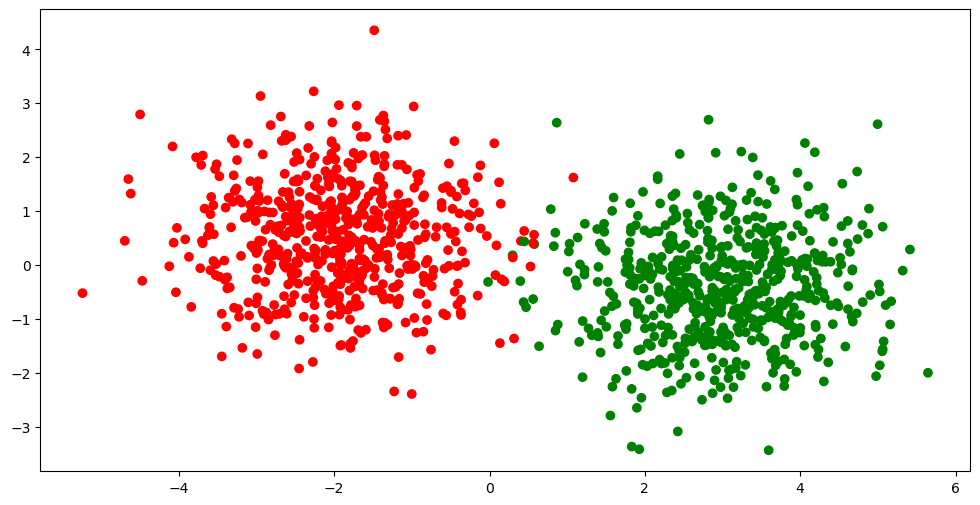

In [26]:
# генерируем 1200 точек, распределенных вокруг двух центров: (-2,0.5) и (3,-0.5)
X, y = make_blobs(n_samples=1200, centers=[[-2,0.5],[3,-0.5]], cluster_std=1, random_state=42)

# отрисовываем точки на плоскости, покрасив их в два цвета в зависимости от класса
colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y.ravel() == cl] = str(colors[i])

plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=200)

In [29]:
X_train

array([[-2.83235557,  0.97141556],
       [ 3.04360245,  1.19505104],
       [-3.59299373,  0.94047474],
       ...,
       [-1.36759226,  1.47255445],
       [ 4.26570784, -1.36617485],
       [-1.9947563 ,  0.54698059]], shape=(1000, 2))

In [32]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.fc1 = nn.Linear(2, 2)
        self.act1 = nn.Sigmoid() # можно заменить на nn.Tanh / nn.ReLU / ...

        self.fc2 = nn.Linear(2, 1)
        self.act2 = nn.Sigmoid()


    def forward(self, x):
        """
        params:
            x (torch.Tensor): данные, поданные на вход сети
        """

        x = self.fc1(x)
        x = self.act1(x)

        x = self.fc2(x)
        x = self.act2(x)
        return x

In [33]:
model = Net()

In [34]:
nn_prediction = model(torch.FloatTensor(X_test))

nn_prediction = nn_prediction.tolist()

In [36]:
nn_prediction = np.array([int(x[0] > 0.5) for x in nn_prediction])

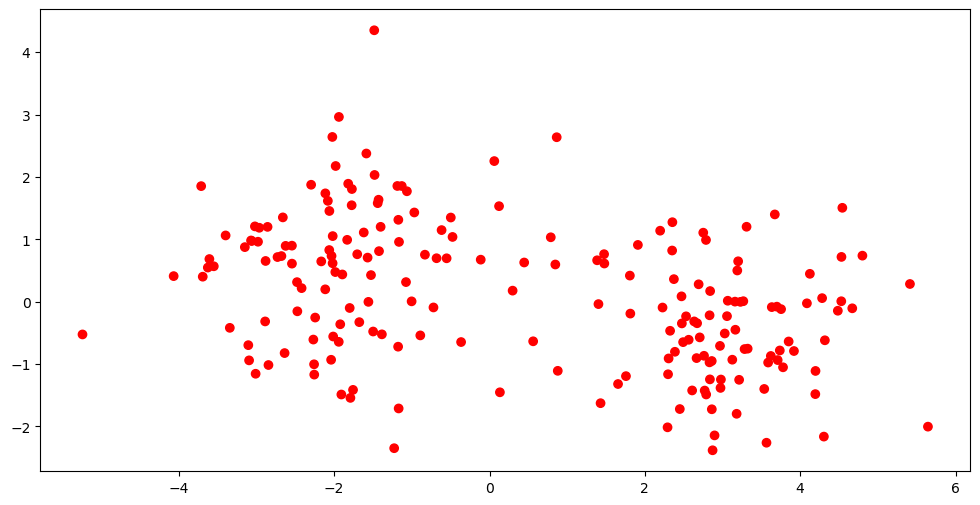

In [38]:
colors = ("red", "green")
colored_y = np.zeros(len(nn_prediction), dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[nn_prediction.ravel() == cl] = str(colors[i])

plt.figure(figsize=(12,6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y)
plt.show()

In [40]:
def train(model, X, y, criterion, optimizer, num_epoch):
    '''
    args:
        model - модель нейронной сети
        X и y - обучающая выборка
        criterion - функция потерь, взятая из модуля `torch.nn`
        optimizer - оптимизатор, взятый из модуля `torch.optim`
        num_epoch - количество эпох обучения.
    '''
    # цикл по количеству эпох обучения
    for t in tqdm(range(num_epoch)):
        # Вычислим предсказания нашей модели
        y_pred = model(X)

        # Посчитаем значение функции потерь  на полученном предсказании
        loss = criterion(y_pred, y)

        # Выполним подсчёт новых градиентов
        loss.backward()
        # Выполним шаг градиентного спуска
        optimizer.step()
        # Обнулим сохраненные у оптимизатора значения градиентов
        # перед следующим шагом обучения
        optimizer.zero_grad()

    return model

In [41]:
model = Net()

In [43]:
# лосс-функция — бинарная кросс-энтропия (aka LogLoss)
criterion = torch.nn.BCELoss()
# оптимизатор — SGD (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
# optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [44]:
X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train).view(-1, 1) # size [1000] -> [1000, 1]

model = train(model, X_train, y_train, criterion, optimizer, 150)

  0%|          | 0/150 [00:00<?, ?it/s]

In [45]:
with torch.no_grad():
    nn_prediction = model(torch.FloatTensor(X_test))
    nn_prediction = nn_prediction.tolist()

nn_prediction = np.array([int(x[0] > 0.5) for x in nn_prediction])

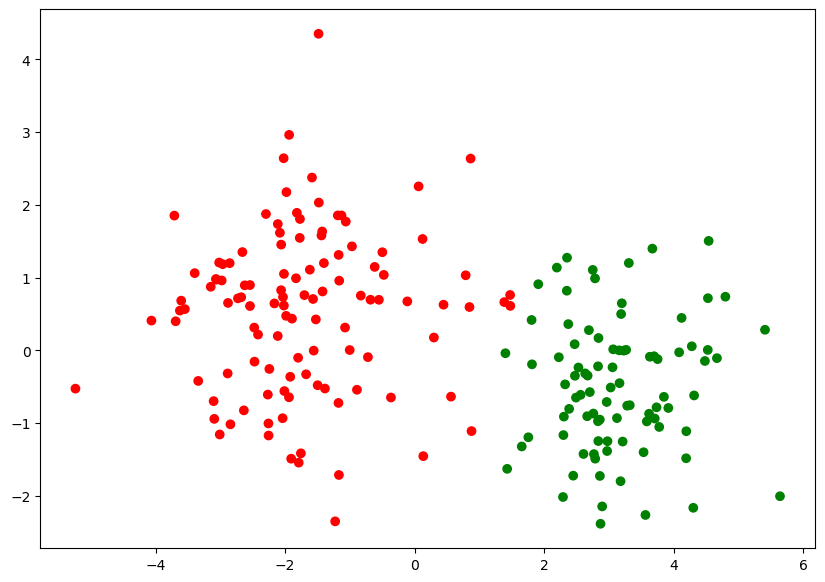

In [46]:
colors = ("red", "green")
colored_y = np.zeros(len(nn_prediction), dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[nn_prediction.ravel() == cl] = str(colors[i])

plt.figure(figsize=(10,7))
plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y)
plt.show()

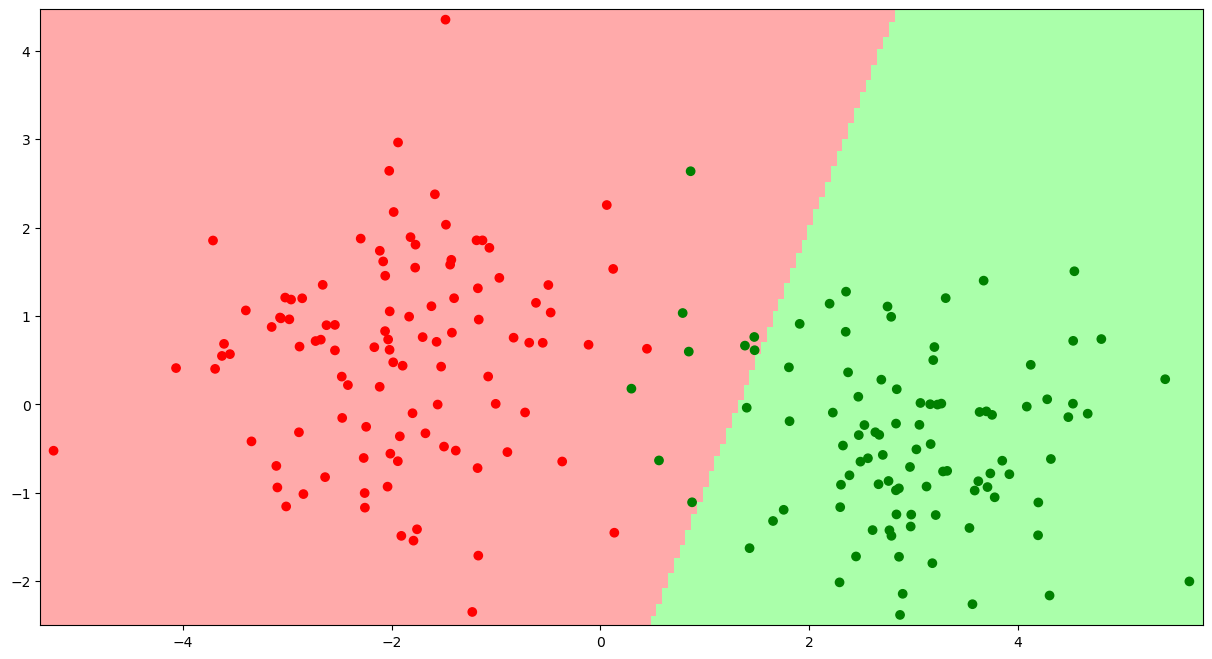

In [48]:
plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X_test[:,0]) - eps, np.max(X_test[:,0]) + eps, 200),
                     np.linspace(np.min(X_test[:,1]) - eps, np.max(X_test[:,1]) + eps, 200))
Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape).detach().numpy()
Z = (Z>0.5).astype(int)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

colored_y = np.zeros(y_test.size, dtype=str)
for i, cl in enumerate([0,1]):
    colored_y[y_test.ravel() == cl] = str(colors[i])

plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y);

In [49]:
train_loader = torch.utils.data.DataLoader(list(zip(X_train, y_train)), batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(list(zip(X_test, y_test)), batch_size=64, shuffle=False)

In [51]:
def train_stochastic(model, loader, criterion, optimizer, num_epoch):
    '''
    args:
        model - модель нейронной сети
        X и y - обучающая выборка
        criterion - функция потерь, взятая из модуля `torch.nn`
        optimizer - оптимизатор, взятый из модуля `torch.optim`
        num_epoch - количество эпох обучения.
    '''
    # цикл по количеству эпох обучения
    for t in tqdm(range(num_epoch)):
        epoch_loss = []

        # цикл по батчам даталоадера
        for X_batch, y_batch in loader:
            # Вычислим предсказания нашей модели
            y_pred = model(X_batch)

            # Посчитаем значение функции потерь  на полученном предсказании
            loss = criterion(y_pred, y_batch)
            epoch_loss.append(loss.item())

            # Выполним подсчёт новых градиентов
            loss.backward()
            # Выполним шаг градиентного спуска
            optimizer.step()
            # Обнулим сохраненные у оптимизатора значения градиентов
            # перед следующим шагом обучения
            optimizer.zero_grad()

        print("curr_loss", np.mean(epoch_loss))

    return model

In [52]:
model = Net()

# лосс-функция — бинарная кросс-энтропия (aka LogLoss)
criterion = torch.nn.BCELoss()
# оптимизатор — SGD (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
# optimizer = torch.optim.Adam(NN.parameters(), lr=1e-4)

In [53]:
model = train_stochastic(model, train_loader, criterion, optimizer, 350)

  0%|          | 0/350 [00:00<?, ?it/s]

curr_loss 0.7784381471574306
curr_loss 0.7803878374397755
curr_loss 0.7754268907010555
curr_loss 0.7708838991820812
curr_loss 0.7715741470456123
curr_loss 0.766597330570221
curr_loss 0.7649731636047363
curr_loss 0.7648266702890396
curr_loss 0.7655990310013294
curr_loss 0.7628377787768841
curr_loss 0.7598478905856609
curr_loss 0.7579143159091473
curr_loss 0.7508694790303707
curr_loss 0.754487294703722
curr_loss 0.7492016889154911
curr_loss 0.7495446018874645
curr_loss 0.7482618950307369
curr_loss 0.7432509809732437
curr_loss 0.741835568100214
curr_loss 0.7376563511788845
curr_loss 0.7414140552282333
curr_loss 0.7380991093814373
curr_loss 0.735539436340332
curr_loss 0.7348011769354343
curr_loss 0.7306484207510948
curr_loss 0.7306982949376106
curr_loss 0.7266675196588039
curr_loss 0.7272969856858253
curr_loss 0.7256844826042652
curr_loss 0.7258543223142624
curr_loss 0.7222866974771023
curr_loss 0.720635175704956
curr_loss 0.7175100520253181
curr_loss 0.7153477817773819
curr_loss 0.7146520

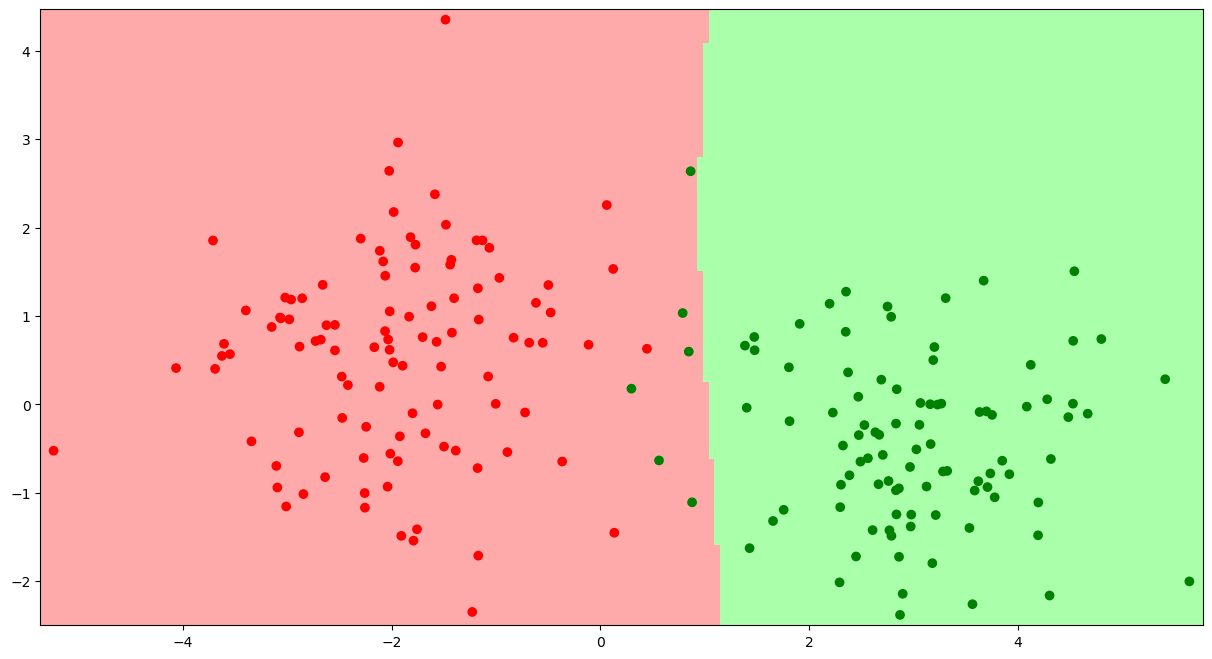

In [54]:
plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X_test[:,0]) - eps, np.max(X_test[:,0]) + eps, 200),
                     np.linspace(np.min(X_test[:,1]) - eps, np.max(X_test[:,1]) + eps, 200))

Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))

Z = Z.reshape(xx.shape).detach().numpy()
Z = (Z>0.5).astype(int)
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

colored_y = np.zeros(y_test.size, dtype=str)
for i, cl in enumerate([0,1]):
    colored_y[y_test.ravel() == cl] = str(colors[i])

plt.scatter(X_test[:, 0], X_test[:, 1], c=colored_y);